<a href="https://colab.research.google.com/github/nerdistry/AI_Assignment_Graphtheory/blob/main/AI_Task_(139133).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [11]:
data_file=files.upload()
data_file

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex (1).csv


{'Nairobi Office Price Ex (1).csv': b'LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE\r\nkaren,yes,serene,no,yes,yes,yes,yes,32.50234527,31.70700585\r\nmadaraka,yes,semi_serene,yes,yes,yes,no,no,53.42680403,68.77759598\r\nkaren,no,noisy,no,yes,yes,yes,yes,61.53035803,62.5623823\r\nkaren,yes,semi_serene,no,no,no,yes,yes,47.47563963,71.54663223\r\nburuburu,no,semi_serene,no,yes,yes,yes,yes,59.81320787,87.23092513\r\ndonholm,no,serene,no,no,yes,no,yes,55.14218841,78.21151827\r\nlangata,no,very_noisy,yes,yes,no,no,yes,52.21179669,79.64197305\r\nlangata,yes,serene,no,no,yes,yes,no,39.29956669,59.17148932\r\ndonholm,yes,semi_serene,yes,no,no,yes,no,48.10504169,75.3312423\r\nkaren,yes,serene,no,no,no,no,no,52.55001444,71.30087989\r\nmadaraka,yes,noisy,yes,yes,no,yes,yes,45.41973014,55.16567715\r\nlangata,no,semi_serene,yes,no,yes,yes,yes,54.35163488,82.47884676\r\nburuburu,yes,semi_serene,yes,yes,no,no,no,44.1640495,62.00892325\r\nkaren,yes,semi_serene,yes,yes,yes,yes,yes,58.

In [12]:
data_reading = pd.read_csv(io.BytesIO(data_file['Nairobi Office Price Ex (1).csv']))
data_reading

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


In [72]:
x_scaler = StandardScaler()
X = x_scaler.fit_transform(data_reading['SIZE'].values.reshape(-1,1))
X

array([[-2.28520557],
       [ 0.40190153],
       [ 1.44255533],
       [-0.36234362],
       [ 1.22203988],
       [ 0.62219022],
       [ 0.24587098],
       [-1.41231026],
       [-0.28151616],
       [ 0.28930471],
       [-0.62636235],
       [ 0.52066778],
       [-0.78761614],
       [ 1.01082367]])

In [73]:
y = data_reading['PRICE']
y.head(2)

0    31.707006
1    68.777596
Name: PRICE, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [79]:
model = Sequential([
    Dense(64,input_dim=1),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                128       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
prediction_model= model.fit(X_train,y_train,epochs=1000)
prediction_model

In [77]:
y_prediction = model.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error on Test Set: {mse}')

1/1 [==============================] - 0s 77ms/step
Mean Squared Error on Test Set: 108.17612587994483


In [78]:
size = 100
size_scaled = x_scaler.transform([[size]])
price_pred = model.predict(size_scaled)
print('Predicted Office Price for 100 sq. ft.:', price_pred[0][0])

1/1 [==============================] - 0s 25ms/step
Predicted Office Price for 100 sq. ft.: 124.14627


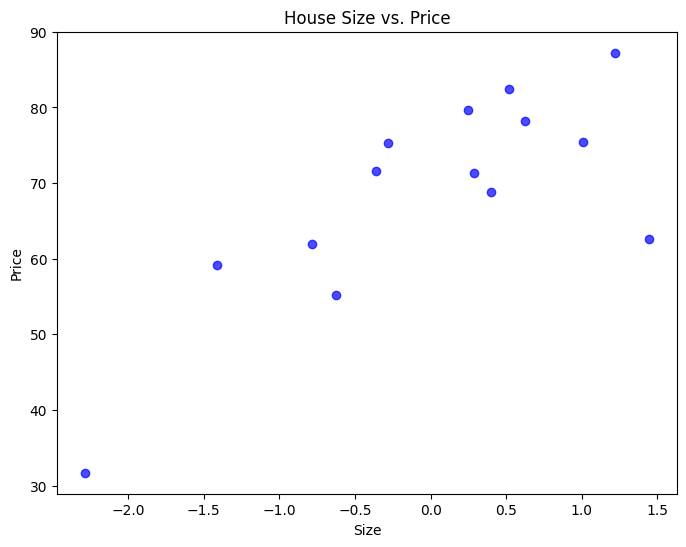

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('House Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'True vs Predicted Office Prices')

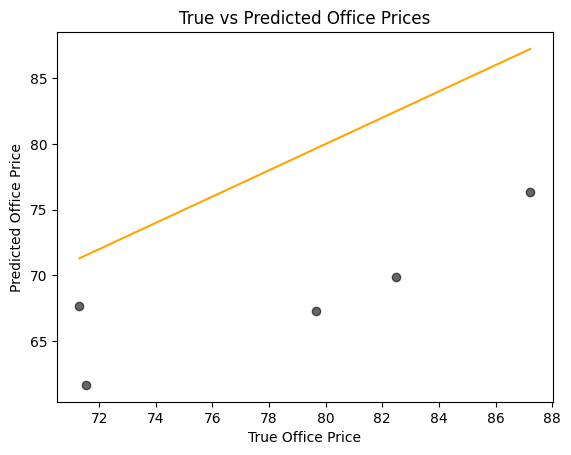

In [85]:
plt.scatter(y_test, y_prediction, color='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange')
plt.xlabel('True Office Price')
plt.ylabel('Predicted Office Price')
plt.title('True vs Predicted Office Prices')